<div style="background-color: #611491; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Creación de presentación analítica impactante sobre rendimiento de ventas</h1>
</div>

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Cargar librerías y configurar Matplotlib</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle

from pathlib import Path

# configurar directorio para guardar las imágenes generadas
actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_4"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

# Configuración profesional para presentación
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 14,
    'figure.titlesize': 20,
    'figure.figsize': (16, 10),
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

Carpeta creada


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Generar dataset de rendimiento de ventas</h2>
</div>

In [2]:
np.random.seed(42)
meses = pd.date_range('2024-01-01', periods=12, freq='ME')

df = pd.DataFrame({
    'mes': meses,
    'ventas_objetivo': [100000, 105000, 110000, 108000, 115000, 120000, 
                       125000, 128000, 130000, 135000, 138000, 140000],
    'ventas_real': [95000, 102000, 105000, 112000, 118000, 115000,
                   122000, 135000, 128000, 142000, 145000, 148000],
    'margen_promedio': np.random.normal(0.25, 0.05, 12),
    'clientes_nuevos': np.random.randint(50, 150, 12),
    'satisfaccion': np.random.normal(4.2, 0.3, 12).clip(1, 5)
})

df['cumplimiento'] = (df['ventas_real'] / df['ventas_objetivo'] * 100).round(1)
df['mes_nombre'] = df['mes'].dt.strftime('%b %Y')

print("Dataset de rendimiento de ventas preparado")
print(f"Promedio de cumplimiento: {df['cumplimiento'].mean():.1f}%")
print(f"Mejor mes: {df.loc[df['cumplimiento'].idxmax(), 'mes_nombre']} ({df['cumplimiento'].max()}%)")
print(f"Peor mes: {df.loc[df['cumplimiento'].idxmin(), 'mes_nombre']} ({df['cumplimiento'].min()}%)")

Dataset de rendimiento de ventas preparado
Promedio de cumplimiento: 100.6%
Mejor mes: Dec 2024 (105.7%)
Peor mes: Jan 2024 (95.0%)


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Creación de diapositiva de título impactante</h2>
</div>

Diapositiva de título guardada


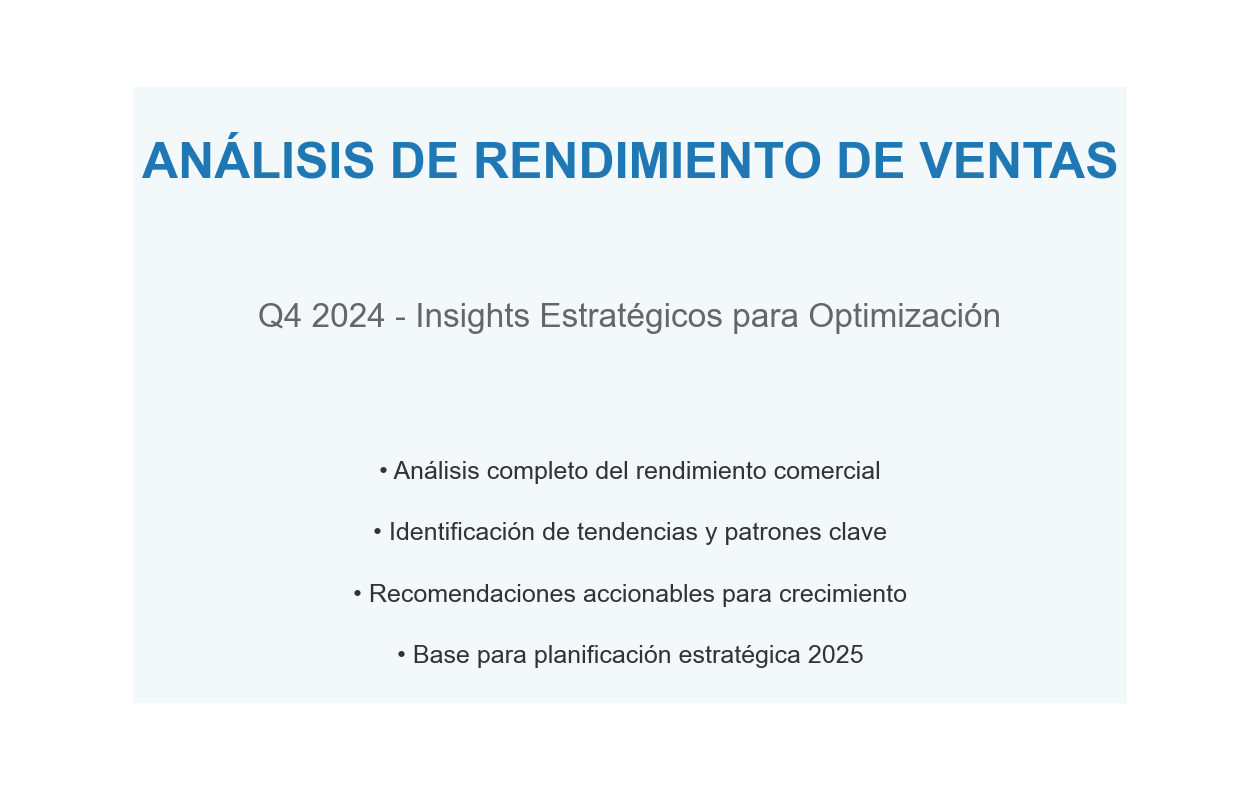

In [3]:
# Diapositiva 1: Título y contexto
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Título principal
ax.text(0.5, 0.8, 'ANÁLISIS DE RENDIMIENTO DE VENTAS', 
        ha='center', va='center', fontsize=36, fontweight='bold', color='#1f77b4')

# Subtítulo
ax.text(0.5, 0.6, 'Q4 2024 - Insights Estratégicos para Optimización', 
        ha='center', va='center', fontsize=24, color='#666666')

# Contexto ejecutivo
contexto = """
• Análisis completo del rendimiento comercial
• Identificación de tendencias y patrones clave
• Recomendaciones accionables para crecimiento
• Base para planificación estratégica 2025
"""

y_pos = 0.4
for line in contexto.strip().split('\n'):
    ax.text(0.5, y_pos, line, ha='center', va='center', 
            fontsize=18, color='#333333')
    y_pos -= 0.08

# Elemento visual de fondo sutil
rect = Rectangle((0.1, 0.1), 0.8, 0.8, fill=True, alpha=0.05, color='#1f77b4')
ax.add_patch(rect)

plt.savefig(ruta_outputs / 'diapositiva_01_titulo.png', dpi=300, bbox_inches='tight')
print("Diapositiva de título guardada")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Diapositiva de insights principales con jerarquía visual</h2>
</div>

Diapositiva de insights guardada


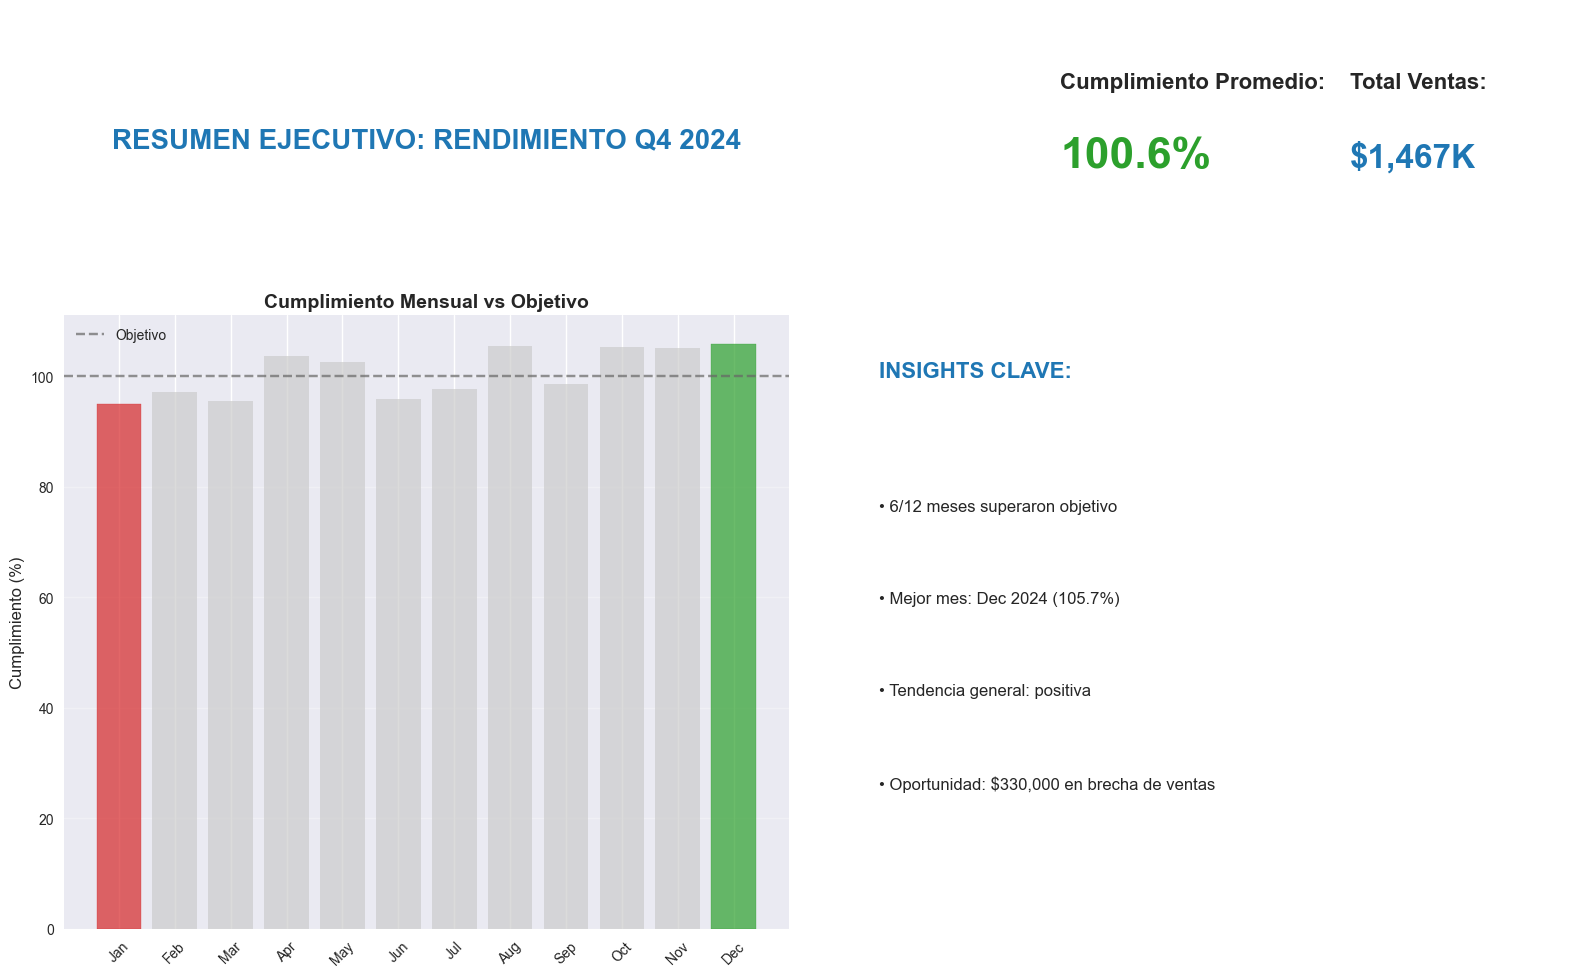

In [4]:
# Diapositiva 2: Insights principales
fig, ((ax_title, ax_kpi), (ax_chart, ax_insights)) = plt.subplots(2, 2, 
                                                                figsize=(16, 10),
                                                                gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.3, 0.7]})

# Título de sección
ax_title.text(0.5, 0.5, 'RESUMEN EJECUTIVO: RENDIMIENTO Q4 2024', 
              ha='center', va='center', fontsize=20, fontweight='bold', color='#1f77b4')
ax_title.axis('off')

# KPIs principales (jerarquía alta)
ax_kpi.axis('off')
cumplimiento_promedio = df['cumplimiento'].mean()
color_kpi = '#2ca02c' if cumplimiento_promedio >= 100 else '#ff7f0e' if cumplimiento_promedio >= 95 else '#d62728'

ax_kpi.text(0.3, 0.7, f'Cumplimiento Promedio:', fontsize=16, fontweight='bold')
ax_kpi.text(0.3, 0.4, f'{cumplimiento_promedio:.1f}%', fontsize=32, fontweight='bold', color=color_kpi)

ax_kpi.text(0.7, 0.7, f'Total Ventas:', fontsize=16, fontweight='bold')
ax_kpi.text(0.7, 0.4, f'${df["ventas_real"].sum()/1000:,.0f}K', fontsize=24, fontweight='bold', color='#1f77b4')

# Gráfico principal con énfasis
bars = ax_chart.bar(range(len(df)), df['cumplimiento'], color='#cccccc', alpha=0.7)

# Resaltar mejor y peor mes
mejor_idx = df['cumplimiento'].idxmax()
peor_idx = df['cumplimiento'].idxmin()

bars[mejor_idx].set_color('#2ca02c')  # Verde para mejor
bars[peor_idx].set_color('#d62728')  # Rojo para peor

ax_chart.axhline(y=100, color='#666666', linestyle='--', alpha=0.7, label='Objetivo')
ax_chart.set_xticks(range(len(df)))
ax_chart.set_xticklabels(df['mes'].dt.strftime('%b'), rotation=45)
ax_chart.set_ylabel('Cumplimiento (%)', fontsize=12)
ax_chart.set_title('Cumplimiento Mensual vs Objetivo', fontsize=14, fontweight='bold')
ax_chart.legend()
ax_chart.grid(True, alpha=0.3, axis='y')

# Panel de insights clave (jerarquía alta)
ax_insights.axis('off')
ax_insights.text(0.05, 0.9, 'INSIGHTS CLAVE:', fontsize=16, fontweight='bold', color='#1f77b4')

insights = [
    f"• {len(df[df['cumplimiento'] >= 100])}/12 meses superaron objetivo",
    f"• Mejor mes: {df.loc[mejor_idx, 'mes_nombre']} ({df.loc[mejor_idx, 'cumplimiento']}%)",
    f"• Tendencia general: {'positiva' if df['cumplimiento'].iloc[-3:].mean() > df['cumplimiento'].iloc[:3].mean() else 'estable'}",
    f"• Oportunidad: ${df[df['cumplimiento'] < 97]['ventas_objetivo'].sum():,.0f} en brecha de ventas"
]

y_pos = 0.7
for insight in insights:
    ax_insights.text(0.05, y_pos, insight, fontsize=12, va='top')
    y_pos -= 0.15

plt.tight_layout()
plt.savefig(ruta_outputs / 'diapositiva_02_insights_principales.png', dpi=300, bbox_inches='tight')
print("Diapositiva de insights guardada")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Diapositiva de recomendaciones con llamado a acción</h2>
</div>

Diapositiva de recomendaciones guardada


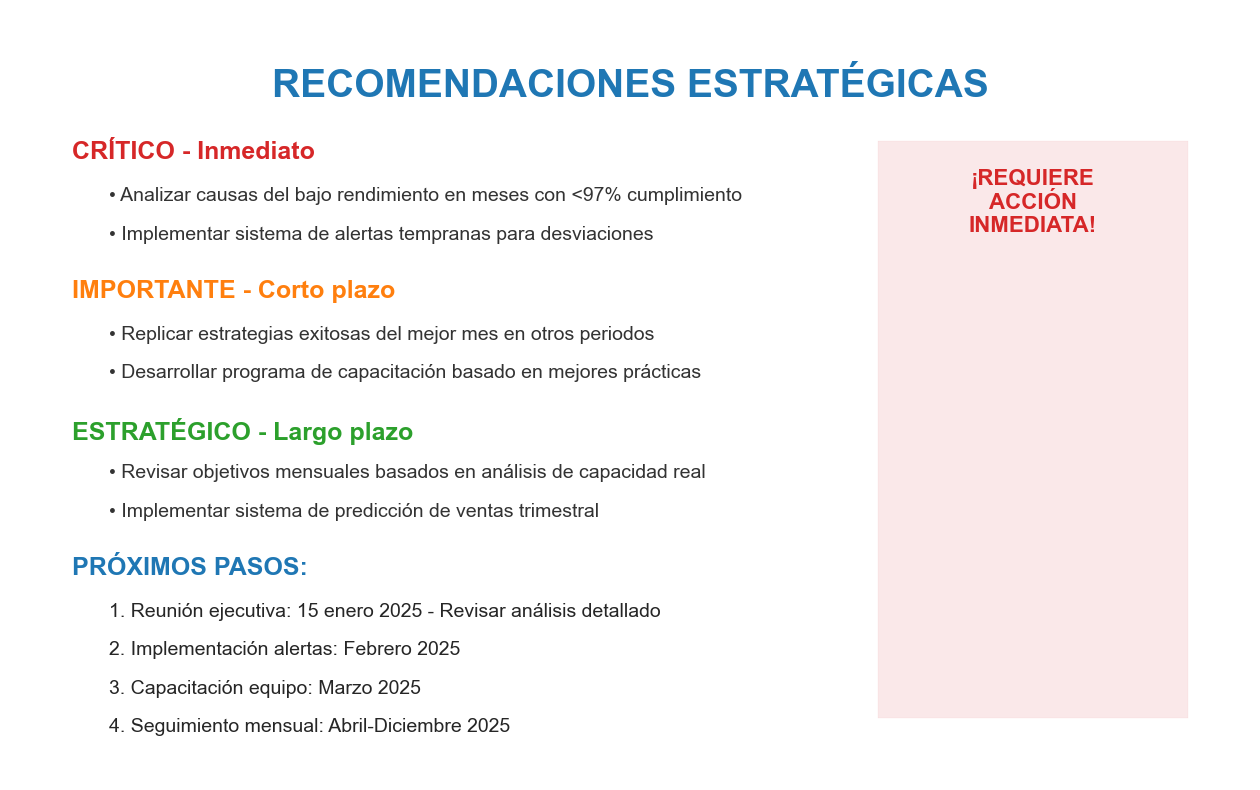

In [5]:
# Diapositiva 3: Recomendaciones y acción
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Título de recomendaciones
ax.text(0.5, 0.9, 'RECOMENDACIONES ESTRATÉGICAS', 
        ha='center', va='center', fontsize=28, fontweight='bold', color='#1f77b4')

# Recomendaciones priorizadas
recomendaciones = [
    ("CRÍTICO - Inmediato", "#d62728", [
        "• Analizar causas del bajo rendimiento en meses con <97% cumplimiento",
        "• Implementar sistema de alertas tempranas para desviaciones"
    ]),
    ("IMPORTANTE - Corto plazo", "#ff7f0e", [
        "• Replicar estrategias exitosas del mejor mes en otros periodos",
        "• Desarrollar programa de capacitación basado en mejores prácticas"
    ]),
    ("ESTRATÉGICO - Largo plazo", "#2ca02c", [
        "• Revisar objetivos mensuales basados en análisis de capacidad real",
        "• Implementar sistema de predicción de ventas trimestral"
    ])
]

y_start = 0.83
for prioridad, color, items in recomendaciones:
    # Encabezado de prioridad
    ax.text(0.05, y_start, prioridad, fontsize=18, fontweight='bold', 
            color=color, va='top')
    
    # Items de la recomendación
    y_item = y_start - 0.06
    for item in items:
        ax.text(0.08, y_item, item, fontsize=14, va='top', color='#333333')
        y_item -= 0.05
    
    y_start -= 0.18

# Próximos pasos
ax.text(0.05, y_start, 'PRÓXIMOS PASOS:', fontsize=18, fontweight='bold', 
        color='#1f77b4', va='top')

proximos_pasos = [
    "1. Reunión ejecutiva: 15 enero 2025 - Revisar análisis detallado",
    "2. Implementación alertas: Febrero 2025",
    "3. Capacitación equipo: Marzo 2025",
    "4. Seguimiento mensual: Abril-Diciembre 2025"
]

y_start -= 0.06
y_step = 0.05
for i, paso in enumerate(proximos_pasos):
    ax.text(0.08, y_start - i*y_step, paso, fontsize=14, va='top')

# Elemento visual de urgencia
rect = Rectangle((0.7, 0.08), 0.25, 0.75, fill=True, alpha=0.1, color='#d62728')
ax.add_patch(rect)
ax.text(0.825, 0.75, '¡REQUIERE\nACCIÓN\nINMEDIATA!', 
        ha='center', va='center', fontsize=16, fontweight='bold', color='#d62728')

plt.savefig(ruta_outputs / 'diapositiva_03_recomendaciones.png', dpi=300, bbox_inches='tight')
print("Diapositiva de recomendaciones guardada")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis</h2>
</div>

Evalúa cómo cada diapositiva guía la atención del espectador: ¿La jerarquía visual comunica claramente qué es más importante? ¿La narrativa fluye lógicamente del problema a la acción? ¿Los insights están respaldados por datos visuales persuasivos?

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Storytelling</h3>
</div>

La narrativa se analiza según las 4 fases del storytelling señaladas en el material de estudio.

**Diapositiva 1 - Establecer Contexto:** 

Presenta el propósito: analizar el rendimiento 2024 para optimizar la gestión comercial 2025. El uso de "Q4" es confuso dado que se analiza el año completo; se recomienda eliminar el término "Q4" o agregar nota aclaratoria si Q4 es convención empresarial para revisiones anuales.

**Diapositiva 2 - Presentar Evidencia + Comunicar Insights:**   

Comunica efectivamente los hallazgos clave mediante KPIs y gráfico de barras:
- Un cumplimiento promedio > 100%, destacado con color apropiado.
- Identificación clara del mejor y peor mes mediante color en el gráfico.
- Número de meses sobre el objetivo visible directamente en el gráfico.
- Una tendencia positiva deducible.
- La brecha de ventas en meses < 97%. que está mencionada numéricamente y que representa una oportunidad de acción.

Mejoras sugeridas:
- Eliminar referencia a "Q4" para consistencia.
- Agregar línea horizontal al 97% para visualizar umbral crítico.
- Cambiar gráfico de barras por gráfico de líneas e incluir recta de regresión lineal para mostrar tendencia positiva de forma más clara, como el que se muestra al final de este notebook.

**Diapositiva 3 - Llamado a la Acción:** 

Presenta recomendaciones priorizadas por urgencia (inmediato/corto/largo plazo) con códigos de color tipo semáforo, que se vinculan de manera clara con el problema identificado: meses bajo el 97% de rendimiento. Incluye cronograma de implementación, aunque falta definir fecha para el sistema de predicción de ventas.

Mejoras sugeridas:
- Llenar el rectángulo de urgencia con texto accionable como "BRECHA DETECTADA ! Anular causas de rendimiento < 97%" (en un formato adecuado),  que crea urgencia inmediata y conecta directamente con el insight de la diapositiva 2.
- Separar "PRÓXIMOS PASOS" en una cuarta diapositiva para no sobrecargar la presentación.
- Cuantificar impacto financiero de las recomendaciones (ej: "Reducir meses < 97% de 3 a 1 = +$XXX proyectado").

**Conclusión:** La narrativa fluye lógicamente del problema a la acción, pero requiere ajustes para fortalecer la evidencia visual y reducir sobrecarga visual y conceptual.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Jerarquía Visual</h3>
</div>

Evaluación por diapositiva de acuerdo a lo señalado en el material de estudio.

**Diapositiva 1:**
- Tamaño y posición: perfectamente jerarquizados; el título domina, subtítulo acompaña y el listado entrega detalle.
- Contraste y color: el azul transmite concentración, confianza y profesionalismo, ideal para contexto corporativo. Fondo azul suave induce calma para lectura concentrada.
- Secuenciación: flujo arriba→abajo es natural, va de lo general a lo específico.

**Diapositiva 2:**
- Tamaño: las fuentes deben ser un poco más grandes para lectura en presentación.
- Posición: Buena estructura en cuadrícula 2x2 con áreas de atención definidas que permiten una lectura natural.
- Contraste y color: verde (positivo) y rojo (negativo) son códigos comerciales universales. Gris para meses neutros evita sobrecarga cromática (buen contraste).
- Secuenciación: flujo izquierda→derecha, arriba→abajo es natural. La vista pasa por título → KPIs → gráfico → insights, lo cual es correcto.


**Diapositiva 3:**
- Tamaño: el tamaño de las fuentes y el espaciado son adecuados, pero la diapositiva luce sobrecargada. Separar "PRÓXIMOS PASOS" en una cuarta diapositiva alivia la sobrecarga.
- Posición: cuadrícula de 1x2, con una zona izquierda en la que el título domina en la parte superior, y una zona derecha que destaca el llamado a la acción.
- Contraste y color: color tipo semáforo: rojo (crítico) → naranjo (importante) → verde (estratégico) es universalmente reconocido. El azul para título mantiene coherencia visual con diapositivas anteriores. Este contraste visual favorece la comprensión del mensaje.
- Secuenciación: flujo izquierda→derecha, arriba→abajo, sin ruido.
- Zona caliente vacía: el recuadro rojo captura la atención de inmediato, lo cual es intencional y adecuado. Se sugiere llenar con mensaje accionable.
  
**Conclusión:** La jerarquía visual comunica claramente qué es más importante. Las decisiones visuales apoyan la narración y priorizan la información correcta.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">Énfasis y Comunicación Persuasiva</h3>
</div>

Evaluación transversal a las tres diapositivas de acuerdo al material de estudio.

**Énfasis:**
- Las tres diapositivas utilizan código de colores consistente (azul corporativo para títulos, verde/rojo para positivo/negativo en diapositiva 2, semáforo rojo/naranja/verde para prioridades en diapositiva 3) y variación de tamaño de fuente para establecer jerarquía (títulos grandes, subtítulos medianos, detalles pequeños). La diapositiva 2 emplea contraste de color en barras para aislar mejor/peor mes del resto (gris neutro), y la diapositiva 3 incluye un rectángulo de fondo rojo como zona de calor visual para señalar urgencia.

**Comunicación persuasiva**
- Marco contextual: la primera diapositiva enmarca el contexto como "Insights Estratégicos" y "Base para planificación 2025", elevando la discusión a nivel ejecutivo (la audiencia objetivo).
- Narrativa emocional: implícita en la identificación del "peor mes" y la "brecha de ventas" que crea urgencia y llama a la acción.
- Credibilidad: en la segunda diapositiva se muestran datos completos (12 meses), reconociendo tanto logros como brechas.
- Llamado a acción específico: la tercera diapositiva contiene recomendaciones con items concretos, y en los "PRÓXIMOS PASOS" se implementa un cronograma de seguimiento. 

**Conclusión:**  Los insights están respaldados por evidencia visual sólida. Se podrían reforzar algunos puntos (línea de tendencia y umbral crítico), pero la estructura actual ya es convincente.

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Sugerencia para la Diapositiva 2</h2>
</div>

Diapositiva sugerida de insights guardada


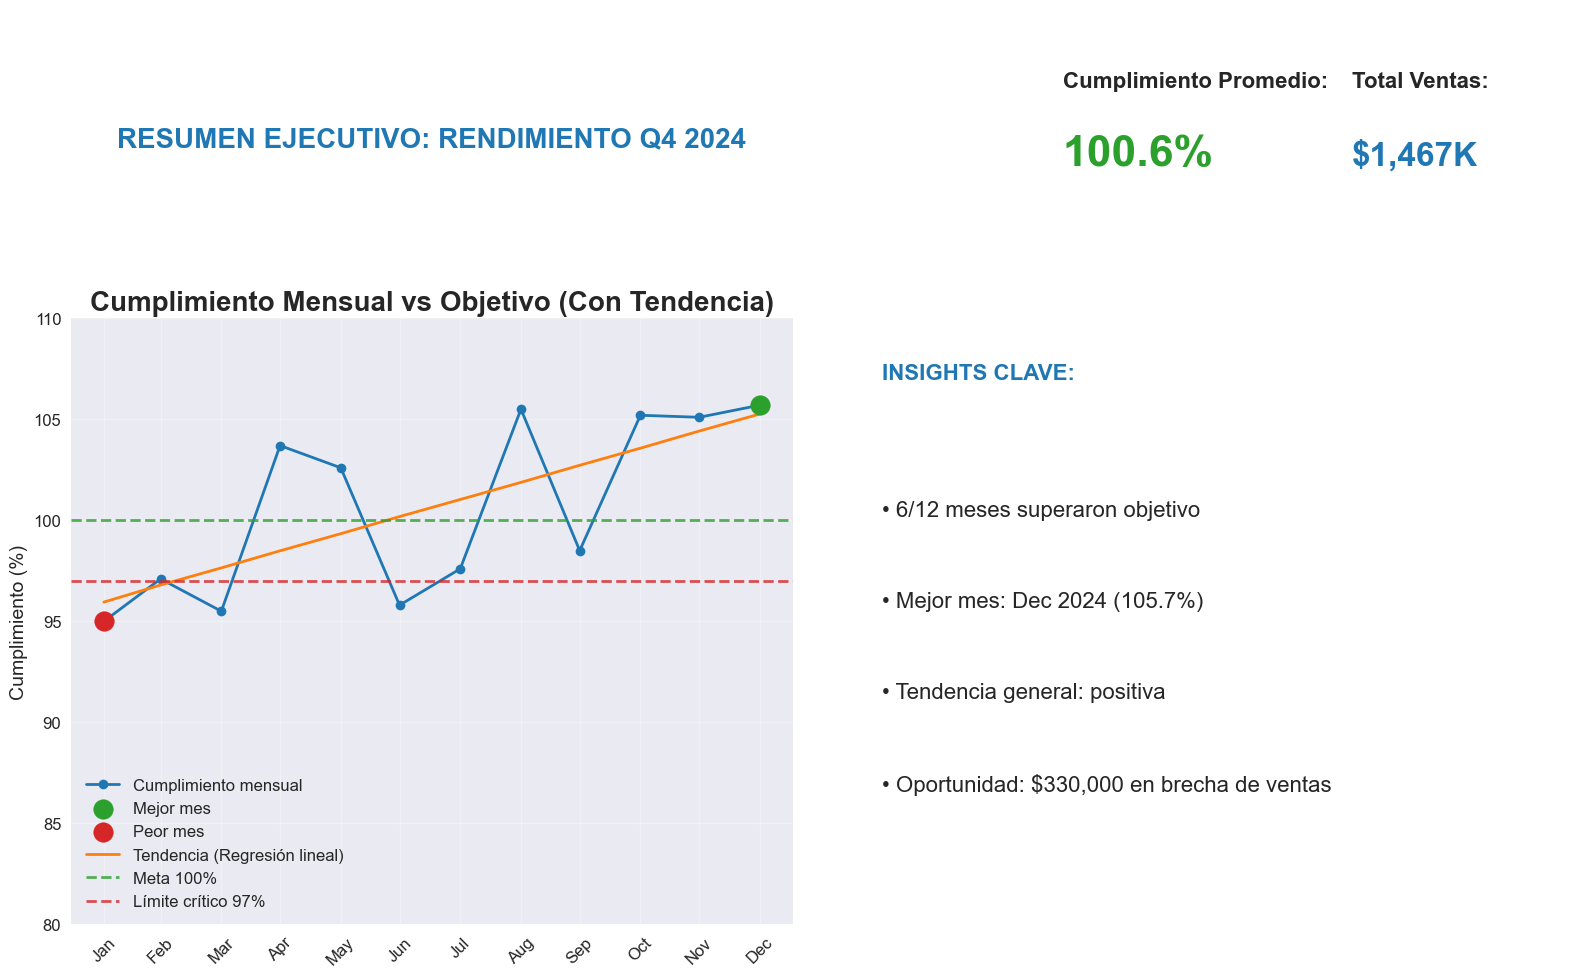

In [6]:
# Diapositiva 2: Insights principales
fig, ((ax_title, ax_kpi), (ax_chart, ax_insights)) = plt.subplots(2, 2, 
                                                                figsize=(16, 10),
                                                                gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.3, 0.7]})

# Título de sección
ax_title.text(0.5, 0.5, 'RESUMEN EJECUTIVO: RENDIMIENTO Q4 2024', 
              ha='center', va='center', fontsize=20, fontweight='bold', color='#1f77b4')
ax_title.axis('off')

# KPIs principales (jerarquía alta)
ax_kpi.axis('off')
cumplimiento_promedio = df['cumplimiento'].mean()
color_kpi = '#2ca02c' if cumplimiento_promedio >= 100 else '#ff7f0e' if cumplimiento_promedio >= 95 else '#d62728'

ax_kpi.text(0.3, 0.7, f'Cumplimiento Promedio:', fontsize=16, fontweight='bold')
ax_kpi.text(0.3, 0.4, f'{cumplimiento_promedio:.1f}%', fontsize=32, fontweight='bold', color=color_kpi)

ax_kpi.text(0.7, 0.7, f'Total Ventas:', fontsize=16, fontweight='bold')
ax_kpi.text(0.7, 0.4, f'${df["ventas_real"].sum()/1000:,.0f}K', fontsize=24, fontweight='bold', color='#1f77b4')

# Gráfico principal con énfasis

# Línea de regresión
X = df['mes'].dt.month
y = df['cumplimiento'].values
z = np.polyfit(X, y, 1)
p = np.poly1d(z)

# Identificar mejor y peor mes
mejor_idx = df['cumplimiento'].idxmax()
peor_idx = df['cumplimiento'].idxmin()

# Crear gráfico
ax_chart.plot(df['mes'], df['cumplimiento'], marker='o', linewidth=2, color="#1f77b4", label="Cumplimiento mensual")

# Puntos destacados
ax_chart.scatter(df['mes'][mejor_idx], df['cumplimiento'][mejor_idx], 
            color="#2ca02c", s=200, zorder=5, label="Mejor mes")

ax_chart.scatter(df['mes'][peor_idx], df['cumplimiento'][peor_idx], 
            color="#d62728", s=200, zorder=5, label="Peor mes")

# Línea de regresión
ax_chart.plot(df['mes'], p(X), color="#ff7f0e", linewidth=2, linestyle="-", label="Tendencia (Regresión lineal)")

# Líneas horizontales
ax_chart.axhline(100, color="#2ca02c", linestyle="--", linewidth=2, alpha=0.8, label="Meta 100%")
ax_chart.axhline(97, color="#d62728", linestyle="--", linewidth=2, alpha=0.8, label="Límite crítico 97%")

# Títulos y formato
ax_chart.set_title("Cumplimiento Mensual vs Objetivo (Con Tendencia)", fontsize=20, fontweight="bold")
ax_chart.set_ylabel("Cumplimiento (%)", fontsize=14)
ax_chart.set_xticks(df['mes'], df['mes'].dt.strftime('%b'), rotation=45, fontsize=12)
ax_chart.tick_params(axis='y', labelsize=12)
ax_chart.grid(alpha=0.3)
ax_chart.set_ylim(80, 110)

ax_chart.legend(fontsize=12)

# Panel de insights clave (jerarquía alta)
ax_insights.axis('off')
ax_insights.text(0.05, 0.9, 'INSIGHTS CLAVE:', fontsize=16, fontweight='bold', color='#1f77b4')

insights = [
    f"• {len(df[df['cumplimiento'] >= 100])}/12 meses superaron objetivo",
    f"• Mejor mes: {df.loc[mejor_idx, 'mes_nombre']} ({df.loc[mejor_idx, 'cumplimiento']}%)",
    f"• Tendencia general: {'positiva' if df['cumplimiento'].iloc[-3:].mean() > df['cumplimiento'].iloc[:3].mean() else 'estable'}",
    f"• Oportunidad: ${df[df['cumplimiento'] < 97]['ventas_objetivo'].sum():,.0f} en brecha de ventas"
]

y_pos = 0.7
for insight in insights:
    ax_insights.text(0.05, y_pos, insight, fontsize=16, va='top')
    y_pos -= 0.15

plt.tight_layout()
plt.savefig(ruta_outputs / 'diapositiva_02_sugerida_insights_principales.png', dpi=300, bbox_inches='tight')
print("Diapositiva sugerida de insights guardada")